In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Bandit Setup




In [25]:
class BanditEnv:
    def __init__(self, K=10, epsilon=0, ucb_c=None, step_size=0.1,):
        self.K = K
        self.epsilon = epsilon
        self.instant = 0
        self.indices = np.arange(self.K)
        self.ucb_c = ucb_c
      
        self.avg_reward = 0
        self.step_size = step_size

       
        
        # actual rewards
        self.q_star = []
        # estimated rewards
        self.q_est = np.zeros(self.K)

        # number of times each action is chosen
        self.no_of_pulls = []

        # initialize real rewards and estimates
        for i in range(0, self.K):
            self.q_star.append(np.random.randn())
            self.q_est[i] = 0
            self.no_of_pulls.append(0)
    
        self.best_arm = np.argmax(self.q_star)
        
    def getAlgo(self):

        if self.epsilon > 0:
            if np.random.binomial(1, self.epsilon) == 1:
                np.random.shuffle(self.indices)
                return self.indices[0]

    #UCB, use the update formula
        if self.ucb_c is not None:
            ucb_est = self.q_est + \
                     self.ucb_c * np.sqrt(np.log(self.instant + 1) / (np.asarray(self.instant) + 1))
            return np.argmax(ucb_est)
    
        
        return np.argmax(self.q_est)

    # now, take an action, get reward, update estimates
    def getReward(self, action):
        # generate the reward under N(real reward, 1)
    
        reward = np.random.randn() + self.q_star[action]
        self.instant += 1
        self.avg_reward = (self.instant - 1.0) / self.instant * self.avg_reward + reward / self.instant
        self.no_of_pulls[action] += 1

        self.q_est[action] += self.step_size * (reward - self.q_est[action])
            
        return reward

figureIndex = 0

In [26]:
#generic bandit simulation
def banditAlgo(num_problems, instant, bandit_insts):
    avgRewards = [np.zeros(instant, dtype='float') for _ in range(0, len(bandit_insts))] 
    best_arm_count = [np.zeros(instant, dtype='float') for _ in range(0, len(bandit_insts))]
    for bandit_ind, bandit in enumerate(bandit_insts):
        for i in range(0,num_problems):
            for t in range(0, instant):
                action = bandit[i].getAlgo()
                reward = bandit[i].getReward(action)
                avgRewards[bandit_ind][t] += reward
                if action == bandit[i].best_arm:
                    best_arm_count[bandit_ind][t] += 1
        best_arm_count[bandit_ind] /= num_problems
        avgRewards[bandit_ind] /= num_problems
    return best_arm_count ,  avgRewards



# Epsilon-Greedy


In [27]:
def epsilonGreedy(num_problems, instant):
    epsilons = [0, 0.1, 0.01]
    bandit_insts = []
       
    for eps_ind, eps in enumerate(epsilons):
        bandit_insts.append([BanditEnv(epsilon=eps) for _ in range(0, num_problems)])
    
    best_arm_count, avgRewards = banditAlgo(num_problems, instant, bandit_insts)
    #plot avg. rewards and %optimal actions vs steps
    global figureIndex
    plt.figure(figureIndex)
    figureIndex += 1
    for eps, counts in zip(epsilons, best_arm_count):
        plt.plot(counts, label='epsilon = '+str(eps))
    plt.xlabel('Steps')
    plt.ylabel('% optimal action')
    plt.legend(loc='lower right')
    plt.figure(figureIndex)
    figureIndex += 1
    for eps, rewards in zip(epsilons, avgRewards):
        plt.plot(rewards, label='epsilon = '+str(eps))
    plt.xlabel('Steps')
    plt.ylabel('average reward')
    plt.legend(loc='lower right')

# UCB

In [28]:
def ucb(num_problems, instant):
    bandit_insts = [[], [], []]
    bandit_insts[0] = [BanditEnv(epsilon=0, step_size=0.1, ucb_c=2) for _ in range(0, num_problems)]
    bandit_insts[1] = [BanditEnv(epsilon=0.01, step_size=0.1) for _ in range(0, num_problems)]
    bandit_insts[2] = [BanditEnv(epsilon=0, step_size=0.1, ucb_c=4) for _ in range(0, num_problems)]
    _, avg_rewards = banditAlgo(num_problems, instant, bandit_insts)
    global figureIndex
    plt.figure(figureIndex)
    figureIndex += 1
    plt.plot(avg_rewards[0], label='UCB c = 2')
    plt.plot(avg_rewards[1], label='epsilon greedy epsilon = 0.1')
    plt.plot(avg_rewards[2], label='UCB c = 4')
    plt.xlabel('Steps')
    plt.ylabel('Average reward')
    plt.legend(loc='best')

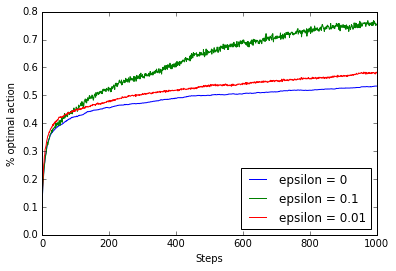

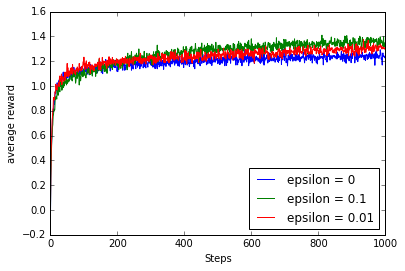

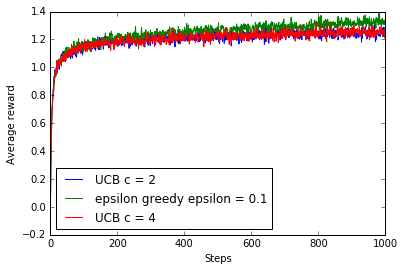

In [29]:
#plot for 10 arms
epsilonGreedy(2000, 1000)
ucb(2000,1000)

    

In [30]:
#plot for 1000 arms

epsilonGreedy(2000, 1000, K=1000)
ucb(2000,1000, K=1000)

TypeError: epsilonGreedy() got an unexpected keyword argument 'K'